In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import cv2

In [2]:
import matplotlib.image as mpimg

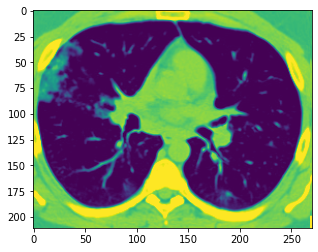

In [3]:
img = cv2.imread("Covid (20).png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [4]:
type(img)

numpy.ndarray

In [5]:
img = cv2.resize(img, (128, 256))

In [6]:
print(img.shape)

(256, 128)


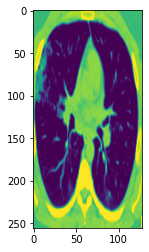

In [7]:
plt.imshow(img)

In [8]:
img = np.array(img)
type(img)
rows = img.shape[0]
cols = img.shape[1]
print(rows)
print(cols)

256
128


In [9]:
mag = []
theta = []
for r in range(rows):
    magnitudeArray = []
    angleArray = []
    for c in range(cols):
        if c-1<=0 or c+1>=cols:
            if c-1 <= 0:
                Gx = img[r][c+1] - 0
            elif c+1 >= cols:
                Gx = 0 - img[r][c-1]
        else:
            Gx = img[r][c+1] - img[r][c-1]
        
        if r-1 <= 0 or r+1 >= rows:
            if r-1 <= 0:
                Gy = 0 - img[r+1][c]
            elif r+1 >= rows:
                Gy = img[r-1][c] - 0
        else:
            Gy = img[r-1][c] - img[r+1][c]
        
        magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
        magnitudeArray.append(round(magnitude, 9))

        
        if Gx == 0:
            angle = math.degrees(0.0)
        else:
            angle = math.degrees(abs(math.atan(Gx / Gy)))
        angleArray.append(round(angle, 9))
    mag.append(magnitudeArray)

    theta.append(angleArray)
            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in long_scalars


In [35]:
print(mag[50][50])
print(img[50][50])

255.001960777
68


In [10]:
mag = np.array(mag)
print(mag.shape)
theta = np.array(theta)  
print(theta.shape)

(256, 128)
(256, 128)


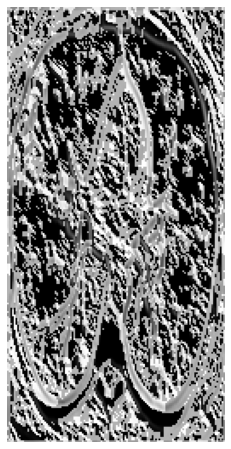

In [11]:
plt.figure(figsize=(15, 8))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

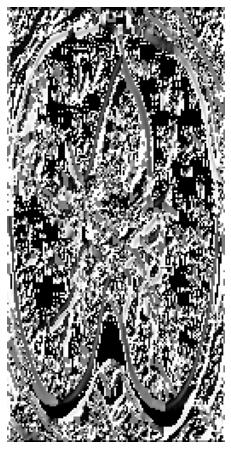

In [12]:
plt.figure(figsize=(15, 8))
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.show()

In [13]:
def calculate_j(angle):
    temp = (angle / step_size) - 0.5
    j = math.floor(temp)
    return j

In [14]:
def calculate_Cj(j):
    Cj = step_size * (j + 0.5)
    return round(Cj, 9)

In [15]:
def calculate_value_j(magnitude, angle, j):
    Cj = calculate_Cj(j+1)
    Vj = magnitude * ((Cj - angle) / step_size)
    return round(Vj, 9)

In [54]:
number_of_bins = 9
step_size = 180 / number_of_bins

histogram_points_nine = []
for i in range(0, rows, 8):
    temp = []
    for j in range(0, cols, 8):
        magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
        angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
        for k in range(len(magnitude_values)):
            for l in range(len(magnitude_values[0])):
                bins = [0.0 for _ in range(number_of_bins)]
                value_j = calculate_j(angle_values[k][l])
                Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
                Vj_1 = magnitude_values[k][l] - Vj
                bins[value_j]+=Vj
                bins[value_j+1]+=Vj_1
                print((bins))
                bins = [round(x, 9) for x in bins]
        temp.append(bins)
    histogram_points_nine.append(temp)


[0.0, 66.740647749, 208.324799009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 77.049526155, 198.736622881, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[99.36609711899999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.636493537]
[103.734779287, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.275424529]
[100.366083578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 94.636480508]
[98.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.0]
[0.0, 0.0, 278.661928171, 40.15620180299999, 0.0, 0.0, 0.0, 0.0, 0.0]
[97.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.0]
[0.0, 60.843548363, 214.942600673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 74.845374788, 200.22734286999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 276.564716442, 43.842836527999964, 0.0, 0.0, 0.0, 0.0, 0.0]
[104.23475238599998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.775399637]
[98.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.0]
[0.0, 0.0, 282.173341563, 39.44910790199998, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 277.61282166, 41.99944343599998, 0.0, 0.0, 0.0, 0.0, 0.0]
[99.86609031299999, 0.0, 0.0, 0.0, 0.0, 0.

[0.0, 0.0, 278.661928171, 40.15620180299999, 0.0, 0.0, 0.0, 0.0, 0.0]
[99.36609711899999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.636493537]
[102.734833942, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 91.275475062]
[98.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.0]
[0.0, 0.0, 279.368173677, 41.64584470799997, 0.0, 0.0, 0.0, 0.0, 0.0]
[97.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.0]
[99.36609711899999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.636493537]
[100.366083578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 94.636480508]
[0.0, 0.0, 280.417588445, 39.802648266999995, 0.0, 0.0, 0.0, 0.0, 0.0]
[96.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 96.5]
[105.606306661, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 88.416887829]
[100.366083578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 94.636480508]
[0.0, 0.0, 283.224075789, 37.60609735600002, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 277.61282166, 41.99944343599998, 0.0, 0.0, 0.0, 0.0, 0.0]
[98.866104002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.136500147]
[105.606306661, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 236.100528659, 20.043961815000017, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 232.945084282, 27.638875315999968, 0.0, 0.0, 0.0, 0.0]
[71.354506006, 12.817936040000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[15.463094565, 82.030494968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 38.757741952, 35.120536317, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.562843425, 37.385840763000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 129.583648909, 127.387166555, 0.0, 0.0, 0.0, 0.0]
[54.826812469000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.412804755]
[0.0, 0.0, 0.0, 206.080415264, 50.921530254000004, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 185.279961142, 72.78204691000002, 0.0, 0.0, 0.0, 0.0]
[61.945661823, 4.341591853999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 86.510802845, 5.928366342000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 43.572503411, 57.743832882999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[43.13974189, 28.330531650999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 229.863912684, 33.274

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.0, 0.0, 0.0, 80.45627053, 128.42886536999998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 92.070640817, 107.51142250500001, 0.0, 0.0, 0.0, 0.0]
[169.22017781699998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 83.22585602]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 237.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 54.499614718, 164.32680050599998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 48.753913153, 162.92981319400002, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 127.060889637, 75.769088423, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 28.657227349, 197.56390340599998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 28.658600495, 182.578233414, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 73.707891725, 68.815790518, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 130.668564577, 29.771455367999977, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.72964426, 234.27868892900003, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, 148.854777051, 187.07676359399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.190923094, 199.892010367, 0.0, 0.0, 0.0, 0.0]
[4.76505091, 0.33396860399999984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[155.25411815799998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.943433173]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 89.802561211, 269.407683632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[214.002758411, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.927231786]
[207.59377615199998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.266265848]
[0.0, 0.0, 0.0, 5.729659066, 211.27955732799998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 20.057030967, 196.056365193, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0]
[152.36854808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.791480361]
[0.0, 0.0, 0.0, 8.594565167, 246.42308128099998, 0.0, 0.0, 0.0, 0.0]
[147.104279329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.992159056]
[211.03115652399998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.128453822]
[193.499394568, 0.0, 0.0, 0.0

[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.914821341, 0.24745631899999987, 0.0, 0.0, 0.0, 0.0]
[0.0, 79.147892215, 277.958534498, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0,

[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[172.121067396, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 80.386358237]
[155.25411815799998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.943433173]
[0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[175.52322371600002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 78.0472793]
[152.86819283799997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 101.291205965]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[126.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 126.0]
[0.0, 87.953799502, 271.964246725, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.0, 99.051791161, 256.640491578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 21.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.958690118, 246.46434976, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.630327197, 9.999818616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 88.034794258, 264.104382773, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 243.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 17.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 5.369650427, 18.796441520000002, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.876154854, 254.31975526000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 8.130223044, 4.908181766, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.459633233, 241.571985345, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 242.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0,

[0.0, 0.0, 0.0, 0.0, 75.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 138.967470919, 54.09469523500002, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 100.549284454, 253.029561067, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 240.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 128.110963602, 206.005782461, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796866, 243.137235646, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 93.147583438, 263.23704024799997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[126.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 126.0]
[0.0, 0.0, 0.0, 0.0, 221.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 247.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 123.686696676, 208.95425089399998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 116.079887858, 234.784758409, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 89.095454

[0.0, 0.0, 0.0, 0.0, 236.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[42.911060739, 199.47912058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 99.035198927, 224.17525882500001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.460550419, 136.59349376799997, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 237.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[32.690227242, 217.32777211, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 179.649350791, 141.13250655100003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.193916181, 123.933685655, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 240.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 189.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[3.657190135, 2.667365185, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729638102, 246.278298281, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8.696755546, 2.7049987049999995, 0.0, 0.0, 0.0, 0.0]
[0.0, 52.12915546, 286.057183708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[205.104014828, 57.08103432600001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[1.828595068, 1.333682592, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729637158, 248.278236736, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.872185913, 5.190071835, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.495115491, 17.779446846, 0

[0.0, 89.802561211, 269.407683632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.0, 95.704523755, 262.80489034699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.733995035, 1.5020729419999999, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8.594565167, 246.42308128099998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 249.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 93.854690823, 265.358337894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[133.233558535, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 121.774284482]
[0.0, 0.0, 0.0, 2.914821341, 0.24745631899999987, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.459625781, 243.571744838, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796552, 248.137195472, 0.0, 0.0, 0.0, 0.0]
[

[132.603648507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 115.414495991]
[0.0, 79.877791615, 207.221494347, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 237.568372722, 14.185475311999994, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 151.152031672, 133.54078523799998, 0.0, 0.0, 0.0, 0.0, 0.0]
[109.263524519, 54.62058087300001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[177.782117569, 37.115532487999985, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[171.62231966899998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 79.887123494]
[0.0, 0.0, 0.0, 22.942672321, 77.376817311, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 18.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 91.46196136, 250.077201841, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 28.473517899, 288.09716931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 273.395530931, 41.21692908900002, 0.0, 0.0, 0.0, 0.0, 0.0]
[128.889549357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 77.306958858]
[143.488891213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.643852312]
[135.603424661, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 118.414291257]
[0.0, 0.0, 

[6.582025436, 1.6641858149999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 122.090279979, 220.385996572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.190465007, 226.883294336, 0.0, 0.0, 0.0, 0.0]
[0.0, 77.026643445, 271.59492789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 65.241426021, 284.862844161, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.944558761, 264.730855065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 93.501138573, 264.297687585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 14.248697539, 13.53619044, 0.0, 0.0, 0.0, 0.0, 0.0]
[17.912861571, 11.498020769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 28.656381026, 208.55449562200002, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.190344053, 235.880792191, 0.0, 0.0, 0.0, 0.0]
[150.758317852, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.446514205]
[0.0, 78.874081931, 269.033951894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 94.726409472, 251.767457718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 72.97924533, 275.65953621899996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 4.6847450

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[201.413474147, 62.241603559, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 60.383421538, 81.18281737500001, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 77.0, 0.0, 0.0, 0.0, 0.0]
[144.225759988, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 109.845096271]
[144.72560898900002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 110.344969479]
[141.84937049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 113.199644407]
[0.0, 0.0, 0.0, 2.86479902, 215.137494546, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864941203, 53.143986657, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 66.18637109, 74.703656946, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.730060046, 83.292409028, 0.0, 0.0, 0.0, 0.0]
[147.604070702, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 107.491989636]
[0.0, 0.0, 0.0, 2.877852949, 3.204909581, 0.0, 0.0, 0.0, 0.0]
[138.975311766, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 116.056058853]
[0.0, 0.0, 0.0, 5.729657588, 213.279474642, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0,

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.384038953, 1.8520290239999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.828595068, 1.333682592, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[131.73360662099998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.274329762]
[0.0, 81.348871196, 276.458339464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.893645721, 1.2294599050000001, 0.0, 0.0, 0.0, 0.0]
[140.84957813800003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 112.199824153]
[0.0, 91.298115922, 265.79150868199997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 87.953799502, 271.964246725, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5]
[0.0, 0.0, 0.0, 34.391306382, 209.90359737199998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 106.493685036, 115.609894404, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 15.026170933, 163.613130454, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 67.148757069, 98.380696503, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 86.246864094, 120.936629457, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796494, 249.13718762500002, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.086946753, 260.055070053, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.944558761, 264.730855065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.768077907, 3.704058048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.828595068, 1.333682592, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 110.517632882, 242.41437190100004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 94.001179886, 217.177225534, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 59.155561448, 201.77546392099998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.459633233, 241.571985345, 0.0,

[0.0, 0.0, 0.0, 0.0, 250.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 102.400704778, 250.480294994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796494, 249.13718762500002, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 7.734322323, 0.07592735299999998, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 4.332588963, 4.8869554939999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 81.348871196, 276.458339464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 89.44900782, 268.34702346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729638102, 246.278298281, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729638102, 246.278298281, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 248.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.794054497, 262.17636680600003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[133.233558535, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 121.774284482]
[0.0, 0.0, 3.196457022, 2.634494873, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 97.554733418, 260.252477242, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 250.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8

[0.0, 0.0, 34.473465839, 82.256992911, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.193567181, 128.92966848, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729757128, 140.28394086, 0.0, 0.0, 0.0, 0.0]
[0.0, 99.405330105, 257.701096608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[128.86578871800003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 123.136195401]
[113.36593009500001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 107.636332337]
[175.12050296400002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 43.094986862]
[0.0, 0.0, 39.382415791, 84.496557405, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 237.692023088, 69.36660323599997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864811688, 142.138636547, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 251.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0]
[214.98649955800002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.491644413]
[152.342910547, 18.493268290999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[149.41335783699998, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.005224457, 267.91282177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 102.400704778, 250.480294994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 87.600218589, 270.903616816, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 134.302031072, 208.35815044900002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.893645721, 1.2294599050000001, 

[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 93.147589977, 263.237033709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 74.74684808, 280.962302772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[193.335134269, 68.90521350399999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[189.664315595, 74.07229544, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 2.864796381, 251.137172115, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.005224565, 267.912821662, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 83.550182937, 274.959231165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 71.0, 0.0, 0.0, 0.0, 0.0]
[186.374480057, 73.24061965799999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729637158, 248.278236736, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[129.865780616, 0.0, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[3.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[14.675580427, 272.242526356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 5.729637158, 248.278236736, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.384038953, 1.8520290239999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.0, 0.0, 0.0, 2.864796381, 251.137172115, 0.0, 0.0, 0.0, 0.0]
[0.0, 292.91277582, 1.924467418000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.467990071, 3.0041458839999997, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729637624, 247.278267391, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864809644, 149.138479794, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.

[0.0, 0.0, 0.0, 0.0, 254.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8.594569913, 243.42328659700001, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.19033243, 236.880523829, 0.0, 0.0, 0.0, 0.0]
[10.939903979, 261.70088533899997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[36.710130172, 221.793254719, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.86479762, 232.13733003000002, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864800342, 202.137638668, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 20.056998732, 197.05587513799998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729640049, 242.278424336, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.767766953, 5.303300859, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 269.323302099, 22.926590971999985, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[31.922204729, 213.624124912, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 220.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864800559, 200.13766248, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.459816847, 203.577389236, 0.0

[0.0, 0.0, 0.0, 126.791765882, 109.34378840799998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729644822, 233.27872323199998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.733995035, 1.5020729419999999, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 2.940314749, 0.6652365259999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[14.876029351000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.144794948]
[0.0, 0.0, 0.0, 51.609584494, 202.02992346999997, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796381, 251.137172115, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796323, 252.137164454, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.35355339, 1.060660172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
[0.0, 0.0, 0.0, 5.729636695, 249.278206322, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0

[170.218029403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 84.224498489]
[0.0, 0.0, 0.0, 34.643292051, 21.650579729, 0.0, 0.0, 0.0, 0.0]
[192.007725821, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.043856201]
[127.775779399, 115.12749353100001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[202.374483431, 34.627626264000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 92.163856942, 87.705540122, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 31.532253582, 148.803544306, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 252.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[232.806637532, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.367573361]
[84.905238295, 148.172002121, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[175.52322371600002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 78.0472793]
[0.0, 0.0, 0.0, 127.540553973, 40.32844256899999, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.459927372, 187.58026957299998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.

[0.0, 149.207119993, 188.13543587600003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[0.0, 0.0, 0.0, 5.729637158, 248.278236736, 0.0, 0.0, 0.0, 0.0]
[0.0, 99.405330105, 257.701096608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 107.250609513, 240.71777985600002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 97.991177946, 253.45867622999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.951299523, 7.897558278999999, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 89.44900782, 268.34702346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.828595068, 1.333682592, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 208.97219331, 64.81787225100001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 205.339433102, 19.171145713000016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 162.287879254, 170.489824326, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8.594565167, 246.42308128099998, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729637624, 247.278267391, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.4

[156.253228902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.942774201]
[149.870381608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.292871111]
[0.0, 75.612496113, 267.35251668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 46.454646072, 10.825367893999996, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 74.621233449, 173.74341782, 0.0, 0.0, 0.0, 0.0]
[0.0, 190.81556591, 133.87813590800002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[167.320086311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 87.065447869]
[177.43257272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.212017923]
[0.0, 76.399270782, 261.60960484099996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 20.144970642, 22.434367069999997, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 60.229389766, 193.64065573, 0.0, 0.0, 0.0, 0.0]
[0.0, 164.159845295, 167.97265838400003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 252.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[170.71696

[173.11858985499998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 81.384848236]
[127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.0]
[0.0, 0.0, 0.0, 14.324989706, 224.727305828, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 8.594568055, 244.423217881, 0.0, 0.0, 0.0, 0.0]
[9.096051216, 230.42430282499998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 212.201094118, 23.648434183000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 152.696389751, 174.217972124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.733995035, 1.5020729419999999, 0.0, 0.0, 0.0, 0.0, 0.0]
[167.819173546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 87.564851013]
[0.0, 0.0, 0.0, 22.922128886, 230.204321727, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864797264, 237.13728606, 0.0, 0.0, 0.0, 0.0]
[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 201.393621239, 58.23110793800001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 209.610038428, 6.482534326999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 180.914409724, 112.11289275799999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0

[196.581548039, 28.809223732999982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[205.141871909, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.589537638]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.659285366, 0.9898252749999994, 0.0, 0.0, 0.0, 0.0]
[221.333378795, 18.518658928000008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[42.992238905, 177.491320573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[63.777244941, 165.800628557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[160.054232549, 74.42604380699999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[218.967451708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.857157032]
[147.104279329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.992159056]
[0.0, 0.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0]
[203.684868623, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.90994073]
[85.496898517, 136.045422496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[26.546192517, 187.698994127, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[117.560979216, 110.81152350699999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[193.540317124, 37.61763752999999

[0.0, 0.0, 0.970088697, 9.800240917, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 153.292692171, 184.147672931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 146.284264965, 187.483618451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[215.980394273, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.919192178]
[0.0, 0.0, 16.916776907, 22.907838595999998, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 34.390650901, 215.897183402, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 63.149148929, 140.045339185, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 220.0, 0.0, 0.0, 0.0, 0.0]
[157.14321638299998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 94.097703851]
[0.0, 0.0, 0.0, 17.190844592, 203.890588369, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 5.729654755, 217.279313675, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 22.631925416, 10.968669816999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 77.498712504, 173.955060584, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 86.217087948, 131.856294197, 0.0, 0.0, 0.0, 0.0]
[0.0, 109.103814194, 238.172732667, 0.0, 0.0, 0

[164.05932730400002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.568077833]
[191.266103023, 17.012556469999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[55.529266891, 140.944649953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[75.69362719, 133.614757735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[216.462204229, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.984631926]
[163.233897705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 77.234395423]
[141.606695814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 101.494106324]
[180.579854529, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.577296789]
[182.743855983, 21.826425338999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[99.597113647, 91.44214933299999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[85.251965042, 112.333459522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[214.427290926, 15.028587185999982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[182.685550258, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 62.216470967]
[189.879042588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.592213754]
[0.0, 202.735646873, 10.78016050399998, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 22.922069283, 232.20339005, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.86479674, 245.137219381, 0.0, 0.0, 0.0, 0.0]
[0.0, 118.377259495, 225.462819612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.960077814, 21.512127239999998, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 67.479587304, 12.520412695999994, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.865178569, 32.149104230999995, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 17.19033243, 236.880523829, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 11.45962949, 242.57186462, 0.0, 0.0, 0.0, 0.0]
[0.0, 117.581587529, 231.183376308, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 81.348871196, 276.458339464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 15.625031337, 51.49426544100001, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 5.335487832, 53.901325046000004, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0

[143.725912036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 109.345224208]
[132.23359036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.774314655]
[0.0, 91.651670917, 266.852164488, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 100.90279319, 254.09016448699998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 102.754205125, 251.54086963600002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[129.73367208000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 118.274392305]
[149.75929615400003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.447227292]
[147.986205709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 102.14176154]
[141.84937049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 113.199644407]
[127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.0]
[0.0, 78.794341992, 276.897940747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 88.034794258, 264.104382773, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 85.832484261, 265.600297363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[141.226694662, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.845875365]
[145.48766982299998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.642907625]
[127.865796

[0.0, 7.261265396, 5.5449830790000005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 5.39005204, 8.063572007000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.21798725, 6.397785856, 0.0, 0.0, 0.0, 0.0, 0.0]
[129.36578468300002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 123.636191594]
[0.0, 0.0, 0.0, 2.914821341, 0.24745631899999987, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 92.005224457, 267.91282177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 3.181980515, 9.545941546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 9.159787286, 3.046768329999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 8.313441074, 8.715945292, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 2.750067412, 16.354905763, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[9.530101819, 0.6679372079999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.5]
[5.485785204, 4.001047776999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 3.282525589, 1.717474411, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 7.734322323, 0.07592735299999998, 0.0, 0.

[0.0, 90.156114601, 270.46834380399997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796494, 249.13718762500002, 0.0, 0.0, 0.0, 0.0]
[0.0, 87.953799502, 271.964246725, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[132.23359036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.774314655]
[0.0, 91.651670917, 266.852164488, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[131.73360662099998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.274329762]
[137.475509711, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 114.556234321]
[0.0, 89.802561211, 269.407683632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 2.864796431, 250.137179846, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[132.23359036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.774314655]
[130.36577687699997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 124.6361839]
[127.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 127.5]
[132.23359036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 120.774314655]
[136.103388557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 118.914257891]
[0.0, 0.0, 0.0, 2.864796431, 250.137179

In [53]:
# histogram_points_nine = np.array(histogram_points_nine)
# print(histogram_points_nine.shape)
print(len(histogram_points_nine))
print(len(histogram_points_nine[0]))
print(len(histogram_points_nine[0][0]))

32
16
9


In [49]:
print(len(bins))

9


In [37]:
#[0.0, 89.802561211, 269.407683632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
print(magnitude_values.shape[1])

8


In [27]:
print(magnitude_values)

[[252.01785651   3.60555127   7.         251.07170291 254.01771592
    3.60555127  61.         196.        ]
 [255.00196078   1.         253.03161858 254.00787389   1.
    2.23606798  61.03277808 195.        ]
 [254.0019685  255.         359.91804623 359.21302872 360.6244584
    1.41421356  62.03224968 194.        ]
 [254.00787389   1.         359.91804623 359.91804623 253.
  255.          62.00806399 193.        ]
 [  1.           4.           1.         253.00197628 254.00787389
    0.         262.42903803 193.        ]
 [255.         255.00784302   2.82842713 253.00197628 254.00787389
  255.00784302 261.45745352 194.        ]
 [360.6244584  254.           2.23606798 253.00197628   0.
  254.03149411  61.         195.        ]
 [320.03906012 317.41613066 194.0025773  320.40755297 191.00261778
  194.010309   204.02205763 320.40755297]]


In [28]:
print(mag.shape)

(256, 128)


In [29]:
print(mag[0][0])

275.065446758


In [47]:
a = []
for i in range(1, 9):
    a.append(i)
print(a)
print(a[1])
print(a[-8])


[1, 2, 3, 4, 5, 6, 7, 8]
2
1
